<a href="https://colab.research.google.com/github/AshutoshDhungana/Fare_amount_prediction/blob/main/TCfellowship_Ashutosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('uber.csv', index_col=0)

In [3]:
df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [6]:
df.shape


(200000, 8)

In [7]:

df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [9]:
df.nunique()

,0
key,200000
fare_amount,1244
pickup_datetime,196629
pickup_longitude,71066
pickup_latitude,83835
dropoff_longitude,76894
dropoff_latitude,90585
passenger_count,8


In [10]:
df.sample(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
44290872,2011-06-02 19:32:00.000000107,7.7,2011-06-02 19:32:00 UTC,-74.003760,40.748108,-73.981868,40.763867,1
39107767,2013-02-26 18:35:00.000000290,5.0,2013-02-26 18:35:00 UTC,-73.990073,40.732702,-73.949058,40.785567,1
30466781,2010-01-22 18:42:26.0000005,10.5,2010-01-22 18:42:26 UTC,-73.951078,40.775201,-73.977057,40.760911,1
6003085,2009-07-02 20:39:00.00000042,6.1,2009-07-02 20:39:00 UTC,-73.966567,40.757655,-73.983477,40.765367,5
20132207,2012-07-03 17:09:38.0000003,16.1,2012-07-03 17:09:38 UTC,-73.967916,40.762861,-73.993475,40.718116,1
37716436,2009-01-29 16:04:40.0000004,8.7,2009-01-29 16:04:40 UTC,-73.982789,40.765732,-73.970184,40.760458,1
13533904,2014-08-11 22:19:00.000000102,4.5,2014-08-11 22:19:00 UTC,-73.980765,40.764037,-73.987028,40.760612,5
20599069,2012-08-16 06:27:09.0000002,4.1,2012-08-16 06:27:09 UTC,-73.977462,40.747194,-73.970429,40.757995,1
12815657,2013-09-09 02:20:11.0000002,37.0,2013-09-09 02:20:11 UTC,-74.008153,40.716668,-73.914715,40.760221,3
9395272,2015-02-14 23:39:18.0000006,5.5,2015-02-14 23:39:18 UTC,-73.970375,40.764435,-73.965897,40.768349,1


In [11]:
df.isnull().sum()

,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [12]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64


In [13]:
df.dropna(inplace=True)


In [14]:
df.isnull().sum()

,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [15]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [16]:
df.isnull().sum()

,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
distance_km,0


In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [18]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'


In [19]:
df['time_of_day'] = df['pickup_hour'].apply(categorize_time)
print(df['time_of_day'])

24238194      evening
27835199      evening
44984355        night
25894730      morning
17610152      evening
              ...    
42598914      morning
16382965        night
27804658        night
20259894    afternoon
11951496        night
Name: time_of_day, Length: 199999, dtype: object


In [20]:
df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350,13.491387
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642,6.515505
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992,14.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,23.000000


In [21]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350,13.491387
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642,6.515505
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992,14.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,23.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 24238194 to 11951496
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                199999 non-null  object             
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
 8   distance_km        199999 non-null  float64            
 9   pickup_hour        199999 non-null  int32              
 10  time_of_day        199999 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(6), int32(1), int64(1), object(2)
memory usage: 17.5

In [23]:
df.shape

(199999, 11)

<Axes: xlabel='distance_km', ylabel='fare_amount'>

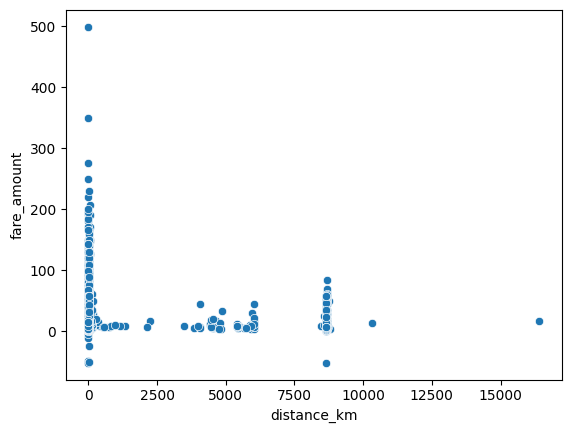

In [24]:
sns.scatterplot(x='distance_km', y='fare_amount', data=df)

<ipython-input-25-6c8f08d01823>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'], bins = 10)


<Axes: xlabel='fare_amount', ylabel='Density'>

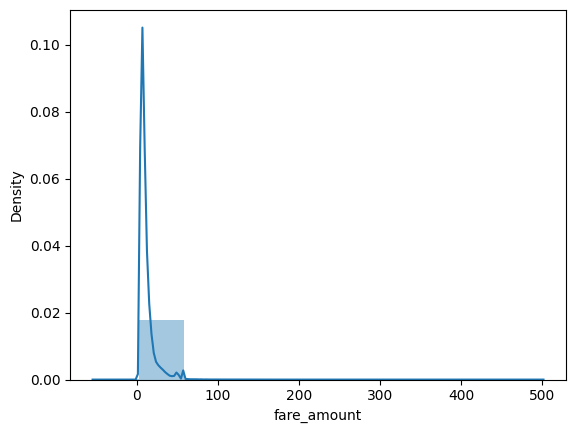

In [25]:
sns.distplot(df['fare_amount'], bins = 10)

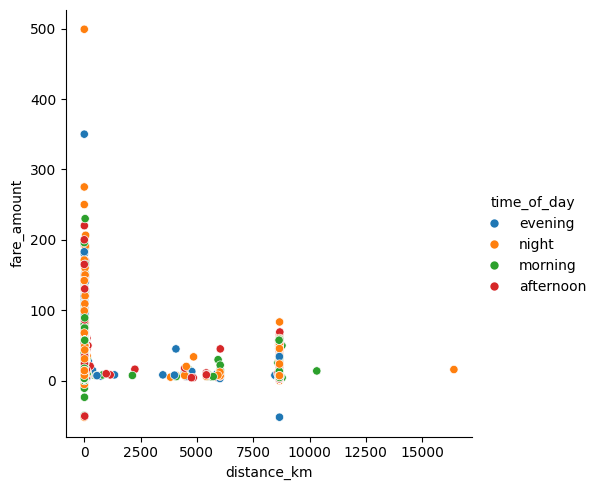

In [26]:
sns.relplot(x='distance_km', y='fare_amount', data=df, hue='time_of_day')

<Axes: xlabel='time_of_day', ylabel='fare_amount'>

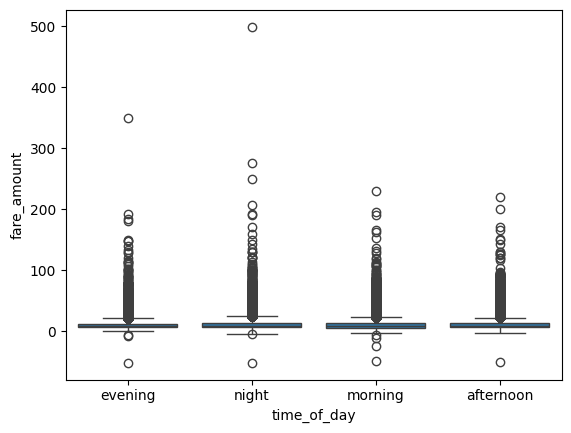

In [27]:
sns.boxplot(x='time_of_day', y='fare_amount', data=df)

<Axes: xlabel='fare_amount'>

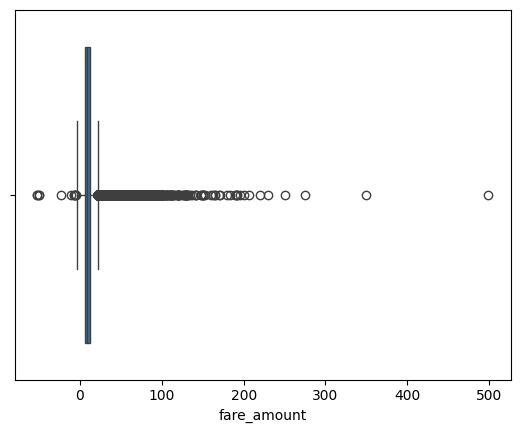

In [28]:
sns.boxplot(x=df['fare_amount'])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


In [32]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 159999
Test set size: 40000


In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = ['fare_amount', 'distance_km']
scaler = StandardScaler()

df[features] = scaler.fit_transform(df[features])

In [34]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,1.999990e+05,199999.000000
mean,-7.830220e-17,-72.527631,39.935881,-72.525292,39.923890,1.684543,4.432032e-18,13.491387
std,1.000003e+00,11.437815,7.720558,13.117408,6.794829,1.385995,1.000003e+00,6.515505
min,-6.398867e+00,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,-5.445777e-02,0.000000
25%,-5.413083e-01,-73.992065,40.734796,-73.991407,40.733823,1.000000,-5.128457e-02,9.000000
50%,-2.888273e-01,-73.981823,40.752592,-73.980093,40.753042,1.000000,-4.891941e-02,14.000000
75%,1.151423e-01,-73.967154,40.767158,-73.963658,40.768001,2.000000,-4.433888e-02,19.000000
max,4.924794e+01,57.418457,1644.421482,1153.572603,872.697628,208.000000,4.279357e+01,23.000000


In [35]:
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


In [36]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,0.114991,-72.527631,39.935881,-72.525292,39.923890,1.684543,0.001271,13.491387
std,0.017971,11.437815,7.720558,13.117408,6.794829,1.385995,0.023338,6.515505
min,0.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,0.105263,-73.992065,40.734796,-73.991407,40.733823,1.000000,0.000074,9.000000
50%,0.109800,-73.981823,40.752592,-73.980093,40.753042,1.000000,0.000129,14.000000
75%,0.117060,-73.967154,40.767158,-73.963658,40.768001,2.000000,0.000236,19.000000
max,1.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,1.000000,23.000000


In [39]:
numerical_df = df.select_dtypes(include=['number'])

numerical_df.info()
numerical_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   distance_km        199999 non-null  float64
 7   pickup_hour        199999 non-null  int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 17.0 MB


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
24238194,0.107985,-73.999817,40.738354,-73.999512,40.723217,1,0.000103,19
27835199,0.108348,-73.994355,40.728225,-73.994710,40.750325,1,0.000150,20
44984355,0.117786,-74.005043,40.740770,-73.962565,40.772647,1,0.000307,21
25894730,0.103993,-73.976124,40.790844,-73.965316,40.803349,3,0.000101,8
17610152,0.123412,-73.925023,40.744085,-73.973082,40.761247,5,0.000273,17


In [41]:
correlation_matrix = numerical_df.corr()

correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158,0.024684,-0.021463
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415,0.105581,0.002432
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559,-0.062436,-0.003821
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033,0.056717,0.003478
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.079944,-0.002544
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000,-0.001472,0.013187
distance_km,0.024684,0.105581,-0.062436,0.056717,-0.079944,-0.001472,1.000000,-0.000638
pickup_hour,-0.021463,0.002432,-0.003821,0.003478,-0.002544,0.013187,-0.000638,1.000000


<Axes: >

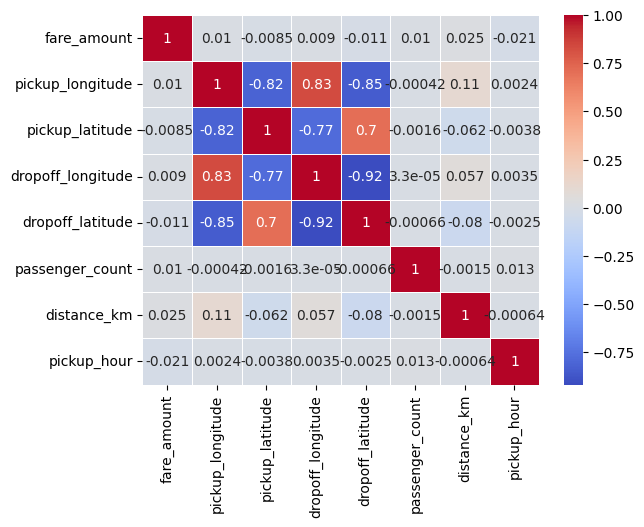

In [42]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [ ]:
sns.pairplot(numerical_df)  #